# **Naive Bayes**

## **Import Libraries**

In [78]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from matplotlib import pyplot as plt

# **Load wine data set**

In [2]:
wine = load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [3]:
wi=pd.DataFrame(wine['data'],columns=wine['feature_names'])
wi

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# **Store the feature matrix (X) and response vector (y)**

In [4]:
x=wine.data
X=np.array(x)
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
print(X.shape)

(178, 13)


In [6]:
x=pd.DataFrame(X)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
y=wine.target
y=np.array(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
# splitting X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [9]:
X_train[1,:]

array([1.327e+01, 4.280e+00, 2.260e+00, 2.000e+01, 1.200e+02, 1.590e+00,
       6.900e-01, 4.300e-01, 1.350e+00, 1.020e+01, 5.900e-01, 1.560e+00,
       8.350e+02])

In [10]:
print(y.shape)
print(y_train.shape)

(178,)
(106,)


In [11]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [12]:
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 
y_pred

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0,
       1, 0, 1, 0, 2, 2])

In [13]:
#classification report to help us calculate precision,recall and f1 on the 13 feature
from sklearn.metrics import accuracy_score,classification_report
cr_NB = classification_report(y_test,y_pred)
acc_NB=accuracy_score(y_test,y_pred)
print(cr_NB)
print("Accuracy : {:.2f}%".format(acc_NB))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.96      0.98        27
           2       1.00      1.00      1.00        17

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

Accuracy : 0.99%


In [14]:
X_train

array([[1.358e+01, 2.580e+00, 2.690e+00, ..., 7.400e-01, 1.800e+00,
        7.500e+02],
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.277e+01, 3.430e+00, 1.980e+00, ..., 7.000e-01, 2.120e+00,
        3.720e+02],
       ...,
       [1.349e+01, 1.660e+00, 2.240e+00, ..., 9.800e-01, 2.780e+00,
        4.720e+02],
       [1.293e+01, 2.810e+00, 2.700e+00, ..., 7.700e-01, 2.310e+00,
        6.000e+02],
       [1.305e+01, 1.650e+00, 2.550e+00, ..., 1.120e+00, 2.510e+00,
        1.105e+03]])

In [15]:
#select two best features 
from sklearn.feature_selection import SelectKBest, chi2

x1=SelectKBest(chi2, k=2).fit_transform(X_train, y_train)
x1

array([[8.660e+00, 7.500e+02],
       [1.020e+01, 8.350e+02],
       [3.400e+00, 3.720e+02],
       [3.800e+00, 4.280e+02],
       [4.500e+00, 7.700e+02],
       [7.700e+00, 7.400e+02],
       [5.680e+00, 1.185e+03],
       [3.050e+00, 8.700e+02],
       [5.280e+00, 6.750e+02],
       [5.250e+00, 1.290e+03],
       [2.620e+00, 4.500e+02],
       [5.640e+00, 1.065e+03],
       [3.850e+00, 7.200e+02],
       [2.650e+00, 5.000e+02],
       [4.600e+00, 6.780e+02],
       [6.250e+00, 1.120e+03],
       [2.300e+00, 4.060e+02],
       [2.800e+00, 6.800e+02],
       [2.800e+00, 4.380e+02],
       [4.900e+00, 1.065e+03],
       [3.800e+00, 6.300e+02],
       [3.210e+00, 8.860e+02],
       [3.050e+00, 4.950e+02],
       [9.300e+00, 8.400e+02],
       [1.950e+00, 4.950e+02],
       [1.280e+00, 5.640e+02],
       [2.760e+00, 3.780e+02],
       [2.900e+00, 5.620e+02],
       [5.750e+00, 1.510e+03],
       [4.200e+00, 1.095e+03],
       [3.840e+00, 9.900e+02],
       [4.000e+00, 8.300e+02],
       [

In [16]:
x_test_new = X_test[:,[9,12]]
x_test_new

array([[   5.88    ,  680.      ],
       [   2.06    ,  345.      ],
       [   5.1     ,  845.      ],
       [   2.85    ,  718.      ],
       [   6.3     , 1375.      ],
       [   5.7     ,  580.      ],
       [   3.8     ,  607.      ],
       [   7.5     , 1547.      ],
       [   7.65    ,  520.      ],
       [   3.3     ,  488.      ],
       [   5.      , 1280.      ],
       [   4.32    ,  735.      ],
       [   2.7     ,  312.      ],
       [   5.43    , 1095.      ],
       [   3.05    ,  520.      ],
       [   3.08    ,  434.      ],
       [   7.1     ,  425.      ],
       [   5.1     ,  920.      ],
       [   2.7     ,  315.      ],
       [   6.9     , 1515.      ],
       [   5.6     , 1265.      ],
       [   3.94    ,  352.      ],
       [   4.1     ,  630.      ],
       [   3.35    ,  985.      ],
       [   6.13    ,  795.      ],
       [   5.58    ,  570.      ],
       [   6.1     ,  985.      ],
       [   4.7     , 1035.      ],
       [   6.2     ,

In [17]:
#train the model on the two features
nb1= GaussianNB()
nb1.fit(x1 ,y_train)
y1_Pred= nb1.predict(x_test_new)
y1_Pred

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0,
       1, 0, 1, 0, 2, 2])

In [18]:
#classification report to help us calculate precision,recall and f1 on the only two features
cr1_NB = classification_report(y_test,y1_Pred)
acc1_NB=accuracy_score(y_test,y1_Pred)
print(cr1_NB)
print("Accuracy : {:.2f}%".format(acc1_NB))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.92      0.89      0.91        27
           2       0.84      0.94      0.89        17

    accuracy                           0.90        72
   macro avg       0.90      0.91      0.90        72
weighted avg       0.91      0.90      0.90        72

Accuracy : 0.90%


In [19]:
# this function can be used to plot the decision boundary
def plotDecisionBoundary( X1_test, y1_test, model, title=''):
    plt.close('all')
    plt.figure()
    cm = plt.cm.Set1
    x_min, x_max = X1_test[:, 0].min() - .5, X1_test[:, 0].max() + .5
    y_min, y_max = X1_test[:, 1].min() - .5, X1_test[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    plt.scatter(
        X1_test[:, 0],
        X1_test[:, 1],
        c=y1_test,
        cmap=cm,
        edgecolors='k',
        alpha=1,
    )
    plt.title(title)
    plt.xlabel("color_intensity ")
    plt.ylabel("proline")

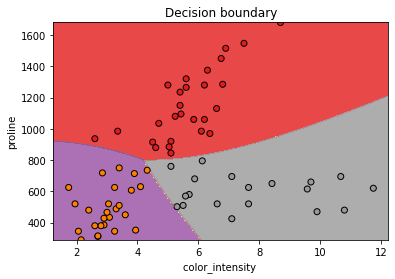

In [20]:
# plot the decision boundary 
plotDecisionBoundary(x_test_new, y1_Pred,model=nb1,title='Decision boundary')

# **Second Part in Programming**

# **KNN Classifier**

# **Importing the libraries**


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import datasets
from scipy.optimize import minimize 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# **Importing the data**

In [22]:
#Read the data
Car_Evaluation = pd.read_csv("/content/car_evaluation.csv")
Car_Evaluation.head()

,Price,Maint,Doors,Ppl,Lug_Boot,Safety,Acceptable
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# **Manipulating the dataset**

In [23]:
Car_Evaluation.columns = ['Price', 'Maint', 'Doors', 'Ppl', 'Lug_Boot', 'Safety', 'Acceptable']
Car_Evaluation

,Price,Maint,Doors,Ppl,Lug_Boot,Safety,Acceptable
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [24]:
D = Car_Evaluation.describe()
print(D)

        Price  Maint Doors   Ppl Lug_Boot Safety Acceptable
count    1728   1728  1728  1728     1728   1728       1728
unique      4      4     4     3        3      3          4
top     vhigh  vhigh     2     2    small    low      unacc
freq      432    432   432   576      576    576       1210


In [25]:
I = Car_Evaluation.info()
print(I)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       1728 non-null   object
 1   Maint       1728 non-null   object
 2   Doors       1728 non-null   object
 3   Ppl         1728 non-null   object
 4   Lug_Boot    1728 non-null   object
 5   Safety      1728 non-null   object
 6   Acceptable  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [26]:
# Show the cloumns as string to can assign it in another cell
cloumns = Car_Evaluation.columns
cloumns

Index(['Price', 'Maint', 'Doors', 'Ppl', 'Lug_Boot', 'Safety', 'Acceptable'], dtype='object')

# **Shuffle the data**

In [27]:
Car_Evaluation = Car_Evaluation.sample(frac = 1).reset_index(drop=True)
Car_Evaluation

,Price,Maint,Doors,Ppl,Lug_Boot,Safety,Acceptable
0,low,med,5more,2,small,low,unacc
1,med,vhigh,2,more,med,high,acc
2,vhigh,high,5more,2,small,high,unacc
3,vhigh,low,5more,4,med,med,acc
4,low,vhigh,3,2,big,low,unacc
...,...,...,...,...,...,...,...
1723,high,high,4,4,big,low,unacc
1724,low,low,5more,2,big,med,unacc
1725,high,vhigh,2,2,small,med,unacc
1726,low,med,2,4,small,low,unacc


# **Label Encoder**

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cloumns = Car_Evaluation.columns
for i in cloumns:
  Car_Evaluation[i] = le.fit_transform(Car_Evaluation[i])
Car_Evaluation.head()

,Price,Maint,Doors,Ppl,Lug_Boot,Safety,Acceptable
0,1,2,3,0,2,1,2
1,2,3,0,2,1,0,0
2,3,0,3,0,2,0,2
3,3,1,3,1,1,2,0
4,1,3,1,0,0,1,2


# **Training and Splitting the data to 3 sets**

In [29]:
x = Car_Evaluation.iloc[:,:-1]
y = Car_Evaluation.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split
#In the this step we will split the data into training and remaining dataset, we will assign training dataset size 1000 that means the remaining dataset will be 728
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=1000)

#We have to define test_size=428 (that is 58.7% of remaining data)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=428)

print(len(x_train))
print(len(x_valid))
print(len(x_test))

1000
300
428


# **Feature Scaling**

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

x = scaler.transform(x)
X_test = scaler.transform(x_test)

# **Training and Predictions (KNN Classifier)**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Acc = []

for i in np.arange(0.1, 1.1, 0.1): 
  model = KNeighborsClassifier(n_neighbors =2)
  #Fiting
  X_train_sample = x_train.sample(frac=i,random_state=2)
  y_train_sample = y_train.sample(frac=i,random_state=2)
  model.fit(X_train_sample, y_train_sample)
  #Predicting
  predict_test = model.predict(x_test)
  predict_val = model.predict(x_valid)
  #Accuracy
  Percent_Accuracy_Test = accuracy_score(y_test,predict_test)
  Percent_Accuracy_Validation =accuracy_score(y_valid,predict_val)


  Acc.append({
      'Samples' : int(i),
      'Test Acc' : Percent_Accuracy_Test,
      'Val Acc' : Percent_Accuracy_Validation
  })
Accu = pd.DataFrame.from_dict(Acc)
print(Accu)

   Samples  Test Acc   Val Acc
0        0  0.684579  0.696667
1        0  0.696262  0.670000
2        0  0.710280  0.686667
3        0  0.733645  0.706667
4        0  0.719626  0.716667
5        0  0.759346  0.760000
6        0  0.754673  0.753333
7        0  0.771028  0.753333
8        0  0.778037  0.760000
9        1  0.757009  0.776667


## **Performance of the Validation set and Testing set**

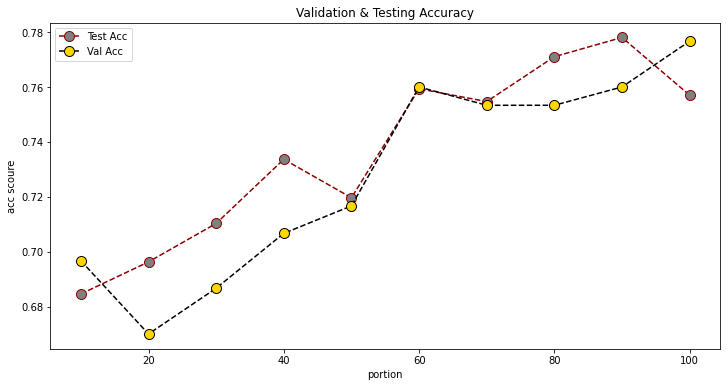

In [33]:
plt.figure(figsize=(12, 6))
portion = list(np.arange(10,101,10))
plt.plot(portion, Accu['Test Acc'], label = 'Test Acc' ,color='darkred', linestyle='dashed', marker='o', markerfacecolor='grey', markersize=10)
plt.plot(portion, Accu['Val Acc'], label = 'Val Acc' ,color='black', linestyle='dashed', marker='o', markerfacecolor='gold', markersize=10)
plt.title('Validation & Testing Accuracy')
plt.xlabel('portion')
plt.ylabel('acc scoure')
plt.legend()
plt.show()

# **Comparing Error Rate with the K Value**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

[0.397196261682243, 0.37850467289719625, 0.3855140186915888, 0.35514018691588783, 0.3598130841121495, 0.34579439252336447, 0.35514018691588783, 0.338785046728972, 0.34813084112149534, 0.34579439252336447]


Text(0, 0.5, 'Mean Error')

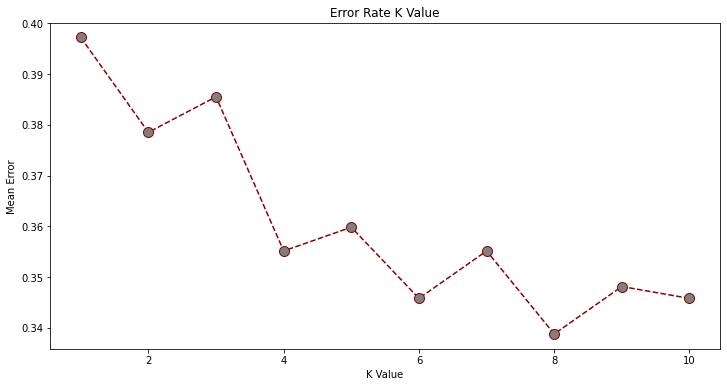

In [34]:
Error = []
#Calculating error for K values between 1 and 10
for s in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=s)
    knn.fit(x_train, y_train)
    pred_s = knn.predict(X_test)
    Error.append(np.mean(pred_s != y_test))
print(Error)   
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), Error, color='darkred', linestyle='dashed', marker='o', markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## **Use 100% of training samples & Find the best K value**

In [35]:
l = []
for i in range(1, 11):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train, y_train)
  pred_t = model.predict(x_test)
  pred_v = model.predict(x_valid)

  acc_t = accuracy_score(y_test,pred_t)
  acc_v = accuracy_score(y_valid,pred_v)
  l.append({
      'n_neighbors' : i,
      'acc_t' : acc_t,
      'acc_v' : acc_v
  })
k_v = pd.DataFrame.from_dict(l)
k_v.sort_values(by = ['acc_v','acc_t'], ascending=False)

,n_neighbors,acc_t,acc_v
5,6,0.918224,0.900000
6,7,0.899533,0.896667
4,5,0.899533,0.893333
3,4,0.873832,0.876667
8,9,0.866822,0.866667
7,8,0.892523,0.863333
2,3,0.880841,0.846667
0,1,0.822430,0.836667
9,10,0.869159,0.833333
1,2,0.808411,0.783333


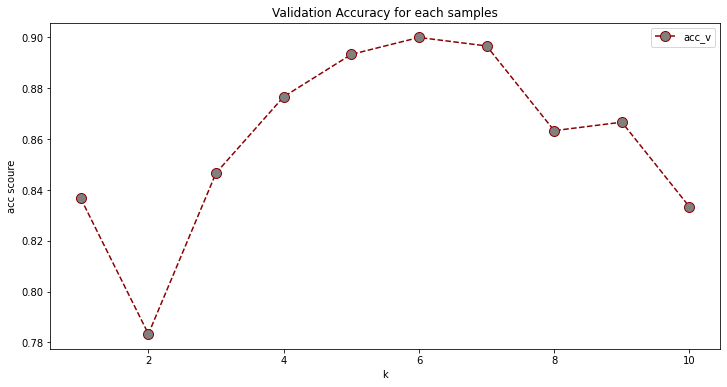

pandas.core.frame.DataFrame

In [36]:
plt.figure(figsize=(12, 6))
portion = list(np.arange(1,11,1))
plt.plot(portion, k_v['acc_v'], label = 'acc_v' ,color='darkred', linestyle='dashed', marker='o', markerfacecolor='grey', markersize=10)
plt.xlabel('k')
plt.ylabel('acc scoure')
plt.title('Validation Accuracy for each samples')
plt.legend()
plt.show()
type(x_train)

## **Analysis the training time when use different number of training samples**

In [79]:
import time
# 10% training set , k=2 
start1 = time.time()
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.iloc[:100], y_train.iloc[:100])
end1 = time.time()
t1 = end1 - start1

start2 =time.time()
pred_t = knn.predict(X_test)
end2 = time.time()
p1 = end2 - start2

# 100% training set , k=2 
start11 = time.time()
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
end11 = time.time()
t2 = end11 - start11

start22 =time.time()
pred_t = knn.predict(X_test)
end22 = time.time()
p2 = end22 - start22


# 10% training set , k=10  
start3 = time.time()
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train.iloc[:100], y_train.iloc[:100])
end3 = time.time()
t3 = end3 - start3

start4 =time.time()
pred_t = knn.predict(X_test)
end4 = time.time()
p3 = end4 - start4

# 100% training set , k=10 
start33 = time.time()
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
end33 = time.time()
t4 = end33 - start33

start44 =time.time()
pred_t = knn.predict(X_test)
end44 = time.time()
p4 = end44 - start44


print("Training time: ",t1)
print("Training time: ",t2)
print("Training time: ",t3)
print("Training time: ",t4)
print("Perdicitoin time: ",p1)
print("Perdicitoin time: ",p2)
print("Perdicitoin time: ",p3)
print("Perdicitoin time: ",p4)

Training time:  0.0027751922607421875
Training time:  0.0025708675384521484
Training time:  0.0021963119506835938
Training time:  0.002512216567993164
Perdicitoin time:  0.012990951538085938
Perdicitoin time:  0.01301884651184082
Perdicitoin time:  0.012617349624633789
Perdicitoin time:  0.014941215515136719


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


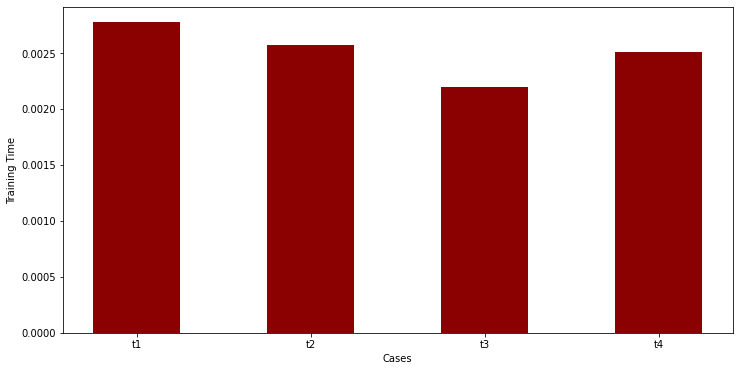

In [80]:
plt.figure(figsize=(12, 6))
cases = ['t1','t2','t3','t4']
times = [t1,t2,t3,t4]
plt.bar(cases, times ,color='darkred', width = 0.5)
plt.xlabel('Cases')
plt.ylabel('Training Time')
plt.show()

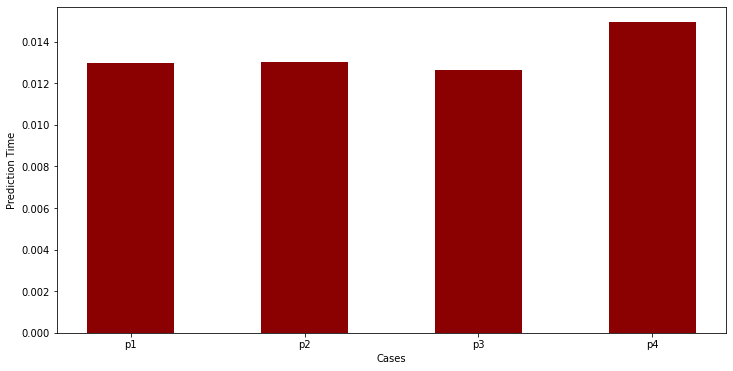

In [81]:
plt.figure(figsize=(12, 6))
cases = ['p1','p2','p3','p4']
times = [p1,p2,p3,p4]
plt.bar(cases, times ,color='darkred', width = 0.5)
plt.xlabel('Cases')
plt.ylabel('Prediction Time')
plt.show()